# Model Testing

In this section, we evaluate three models. The first model is using only the preprocessed finacial data to create a classification model. The second model is using only the preprocessed twitter sentiment to create a model. The last model is combining both datasets to create a classification model. The goal is to compare the two intial models and ultimately have a better model when combining the two datasets.

In [28]:
#importing necessary packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix, accuracy_score, recall_score
from statsmodels.tsa.stattools import adfuller
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


In [4]:
#loading in prerpocessed datasets
tweets = pd.read_csv('data/topic_model_dataframe.csv')
eth = pd.read_csv('data/eth_data_final.csv')

#reconfiguring to be timeseries
tweets['Datetime'] = pd.to_datetime(tweets.Datetime, utc=True)
eth['Date'] = pd.to_datetime(eth.Date, utc=True)

tweets = tweets.loc[:, ['Datetime', 'Reply_Count', 'Amt_of_Likes', 'Amt_of_Retweets', 'Amt_of_Quotes', '0', '1', '2']].copy().set_index('Datetime')
tweets = tweets.resample('d').sum()
eth.set_index('Date', inplace=True)

#final dataset
data = eth.merge(tweets, left_index=True, right_index=True)

data.head()

,High,Low,Open,Close,Volume,Daily_Avg,Future_Returns,Signal,RSI,ADX,...,Corr,Pct_Change,Volatility,Reply_Count,Amt_of_Likes,Amt_of_Retweets,Amt_of_Quotes,0,1,2
2020-01-01 00:00:00+00:00,132.835358,129.198288,129.630661,130.802002,7935230330,131.016823,-0.025931,0,56.198885,67.255758,...,0.95229,0.004969,3.852508,1029,15393,2282,191,44.089286,46.965323,40.945391
2020-01-02 00:00:00+00:00,130.820038,126.954910,130.820038,127.410179,8032709256,128.887474,0.053069,1,56.198885,67.255758,...,0.95229,-0.025931,3.852508,855,7424,1135,100,66.739281,75.879423,63.381296
2020-01-03 00:00:00+00:00,134.554016,126.490021,127.411263,134.171707,10476845358,130.522018,0.006690,1,66.594055,67.255758,...,0.95229,0.053069,5.586140,1121,15250,2548,326,84.990484,106.414922,84.594594
2020-01-04 00:00:00+00:00,136.052719,133.040558,134.168518,135.069366,7430904515,134.546638,0.008939,1,71.613385,62.615949,...,0.95229,0.006690,3.279462,493,4448,547,73,66.328856,82.088475,64.582670
2020-01-05 00:00:00+00:00,139.410202,135.045624,135.072098,136.276779,7526675353,137.227913,0.058905,1,79.784491,76.037625,...,0.95229,0.008939,0.159016,1385,20400,2824,297,55.666648,66.886288,59.447063


In [5]:
#train-test-split

X = data.loc[:, ['Volume', 'RSI', 'ADX', 'Pct_Change', 'Volatility', 'Reply_Count', 'Amt_of_Likes', 'Amt_of_Retweets', 'Amt_of_Quotes', '0', '1', '2']]
y = data.Signal

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, shuffle=False, test_size=0.3)

In [12]:
def evaluate(model, X, y):
     
    
    y_pred = model.predict(X)

    accuracy = accuracy_score(y, y_pred)
    recall = recall_score(y, y_pred)

    plot_confusion_matrix(model, X, y)

    print(accuracy)
    print(recall)

## Model using preprocessed financial data

In [13]:
#using only finance predictors
X_train_finance = X_train.loc[:, ['Volume', 'RSI', 'ADX', 'Pct_Change', 'Volatility']].copy()
X_test_finance = X_test.loc[:, ['Volume', 'RSI', 'ADX', 'Pct_Change', 'Volatility']].copy()

In [18]:
#model creation
pipe = Pipeline([('ss', StandardScaler()), ('rf', RandomForestClassifier(bootstrap=False, criterion='entropy', n_estimators=59, random_state=42))])
pipe.fit(X_train_finance, y_train)

Pipeline(steps=[('ss', StandardScaler()),
                ('rf',
                 RandomForestClassifier(bootstrap=False, criterion='entropy',
                                        n_estimators=59, random_state=42))])

0.4921875
0.7109375


C:\Users\mikey\anaconda3\envs\contest_env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


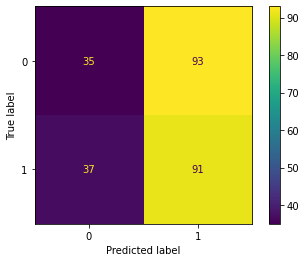

In [19]:
#showing scores
evaluate(pipe, X_test_finance, y_test)

In [22]:
#comparing predictions to true signals
y_pred = pipe.predict(X_test_finance)
finaical_predictions = pd.Series(y_pred, name='Prediction', index=y_test.index)
price_prediction = pd.concat([y_test, finaical_predictions], axis=1)

price_prediction.index

DatetimeIndex(['2021-08-20 00:00:00+00:00', '2021-08-21 00:00:00+00:00',
               '2021-08-22 00:00:00+00:00', '2021-08-23 00:00:00+00:00',
               '2021-08-24 00:00:00+00:00', '2021-08-25 00:00:00+00:00',
               '2021-08-26 00:00:00+00:00', '2021-08-27 00:00:00+00:00',
               '2021-08-28 00:00:00+00:00', '2021-08-29 00:00:00+00:00',
               ...
               '2022-04-23 00:00:00+00:00', '2022-04-24 00:00:00+00:00',
               '2022-04-25 00:00:00+00:00', '2022-04-26 00:00:00+00:00',
               '2022-04-27 00:00:00+00:00', '2022-04-28 00:00:00+00:00',
               '2022-04-29 00:00:00+00:00', '2022-04-30 00:00:00+00:00',
               '2022-05-01 00:00:00+00:00', '2022-05-02 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', length=256, freq=None)

In [39]:
returns_df = data.loc['2021-08-20 00:00:00+00:00': '2022-05-02 00:00:00+00:00', ['Future_Returns']].copy()
returns_df

,Future_Returns
2021-08-20 00:00:00+00:00,-0.018513
2021-08-21 00:00:00+00:00,0.004969
2021-08-22 00:00:00+00:00,0.023794
2021-08-23 00:00:00+00:00,-0.044227
2021-08-24 00:00:00+00:00,0.016536
...,...
2022-04-28 00:00:00+00:00,-0.041315
2022-04-29 00:00:00+00:00,-0.030336
2022-04-30 00:00:00+00:00,0.035737
2022-05-01 00:00:00+00:00,0.010487


In [25]:
#merging predictions, true signals, and future returns

final_predictions_finance = price_prediction.merge(returns_df, left_index=True, right_index=True)

final_predictions_finance.head()

,Signal,Prediction,Future_Returns
2021-08-20 00:00:00+00:00,0,1,-0.018513
2021-08-21 00:00:00+00:00,1,1,0.004969
2021-08-22 00:00:00+00:00,1,0,0.023794
2021-08-23 00:00:00+00:00,0,0,-0.044227
2021-08-24 00:00:00+00:00,1,1,0.016536


In [26]:
#creating empty datasets to append to
returns = []
returns_2 = []

for i in range(len(final_predictions_finance)):

    if final_predictions_finance.iloc[i].Prediction == 1:
        
        #measuring amount of money if an investor were to invest $1000 everytime the model predicts to buy
        money = final_predictions_finance.iloc[i].Future_Returns * 1000
        
        returns.append(money)
        returns_2.append(money)
    
    else:
        returns.append(0)

In [29]:
#saving prediced returns into df
final_predictions_finance['predicted_returns'] = returns

print(sum(returns)) #the total returns over testing period
print(np.mean(returns_2)) #the average returns given the times when invested

11.491333108628272
0.06245289732950061


##### 6 cents per investment day

C:\Users\mikey\anaconda3\envs\contest_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


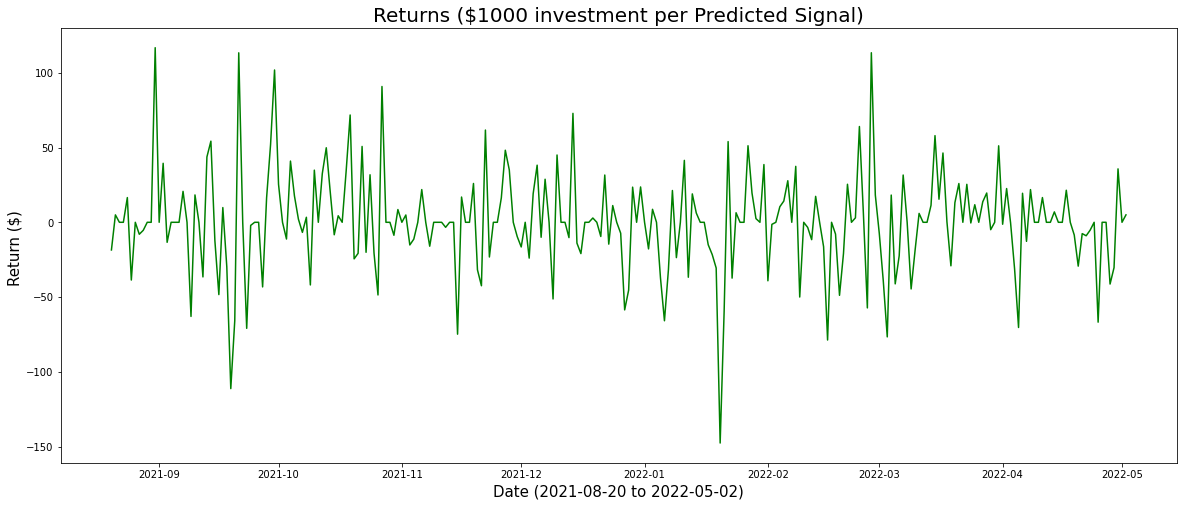

In [32]:
fig, ax = plt.subplots(figsize=(20,8))

sns.lineplot(final_predictions_finance.index, final_predictions_finance.predicted_returns, ax=ax, color='green')
ax.set_title("Returns ($1000 investment per Predicted Signal)", fontsize=20)
ax.set_ylabel('Return ($) ', fontsize=15)
ax.set_xlabel('Date (2021-08-20 to 2022-05-02)', fontsize=15)

plt.show()

## Model using only preprocessed twitter data

In [33]:
X_train_tweets = X_train.loc[:, ['Reply_Count', 'Amt_of_Likes', 'Amt_of_Retweets', 'Amt_of_Quotes', '0', '1', '2']].copy()
X_test_tweets = X_test.loc[:, ['Reply_Count', 'Amt_of_Likes', 'Amt_of_Retweets', 'Amt_of_Quotes', '0', '1', '2']].copy()

In [34]:
pipe_tweets = Pipeline([('ss', StandardScaler()), ('gbc', GradientBoostingClassifier())])
pipe_tweets.fit(X_train_tweets, y_train)

Pipeline(steps=[('ss', StandardScaler()),
                ('gbc', GradientBoostingClassifier())])

0.5
0.7890625


C:\Users\mikey\anaconda3\envs\contest_env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


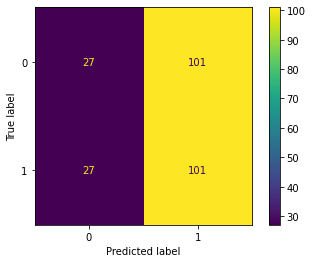

In [36]:
evaluate(pipe_tweets, X_test_tweets, y_test)

In [37]:
y_pred_tweets = pipe_tweets.predict(X_test_tweets)

tweet_predictions = pd.Series(y_pred_tweets, name='predictions_tweets', index=y_test.index)
price_prediction_tweets = pd.concat([y_test, tweet_predictions], axis=1)

price_prediction_tweets.head()

,Signal,predictions_tweets
2021-08-20 00:00:00+00:00,0,1
2021-08-21 00:00:00+00:00,1,1
2021-08-22 00:00:00+00:00,1,1
2021-08-23 00:00:00+00:00,0,1
2021-08-24 00:00:00+00:00,1,0


In [40]:
#merging predictions, true signals, and future returns

final_predictions_tweets = price_prediction_tweets.merge(returns_df, left_index=True, right_index=True)

final_predictions_tweets.head()

,Signal,predictions_tweets,Future_Returns
2021-08-20 00:00:00+00:00,0,1,-0.018513
2021-08-21 00:00:00+00:00,1,1,0.004969
2021-08-22 00:00:00+00:00,1,1,0.023794
2021-08-23 00:00:00+00:00,0,1,-0.044227
2021-08-24 00:00:00+00:00,1,0,0.016536


In [42]:
#creating empty datasets to append to
returns = []
returns_2 = []

for i in range(len(final_predictions_tweets)):

    if final_predictions_tweets.iloc[i].predictions_tweets == 1:
        
        #measuring amount of money if an investor were to invest $1000 everytime the model predicts to buy
        money = final_predictions_tweets.iloc[i].Future_Returns * 1000
        
        returns.append(money)
        returns_2.append(money)
    
    else:
        returns.append(0)

In [43]:
#saving prediced returns into df
final_predictions_tweets['predicted_returns'] = returns

print(sum(returns)) #the total returns over testing period
print(np.mean(returns_2)) #the average returns given the times when invested

-138.4696993526708
-0.685493561151836


#### -0.69 cents per investment day

C:\Users\mikey\anaconda3\envs\contest_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


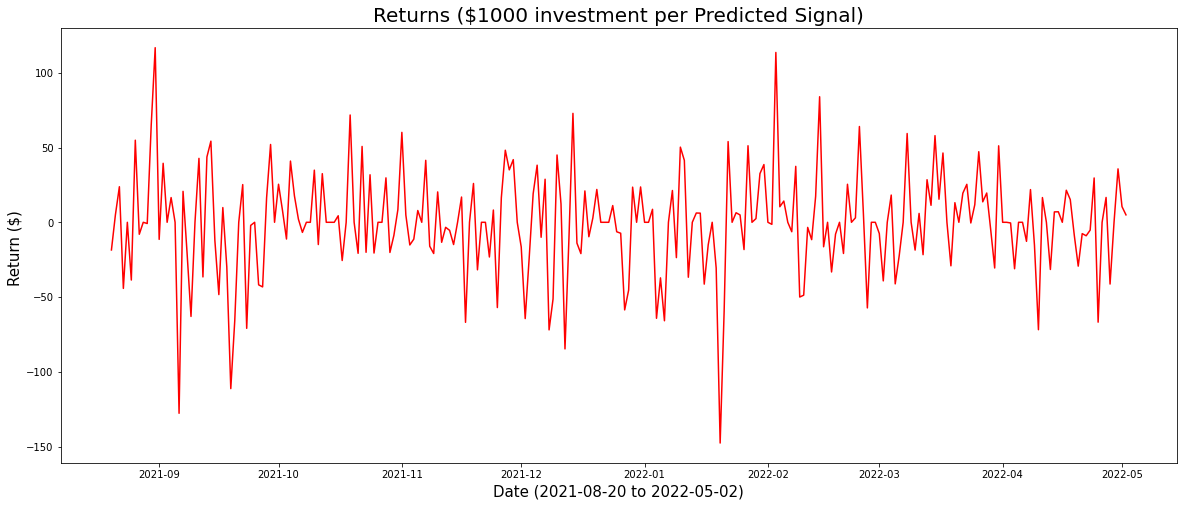

In [54]:
fig, ax = plt.subplots(figsize=(20,8))

sns.lineplot(final_predictions_tweets.index, final_predictions_tweets.predicted_returns, ax=ax, color='red')
ax.set_title("Returns ($1000 investment per Predicted Signal)", fontsize=20)
ax.set_ylabel('Return ($) ', fontsize=15)
ax.set_xlabel('Date (2021-08-20 to 2022-05-02)', fontsize=15)

plt.show()

## Combining both datasets

In [47]:
pipe_final = Pipeline([('ss', StandardScaler()), ('gbc', GradientBoostingClassifier(learning_rate=0.001, max_depth=5, n_estimators=200, subsample=1))])
pipe_final.fit(X_train, y_train)

Pipeline(steps=[('ss', StandardScaler()),
                ('gbc',
                 GradientBoostingClassifier(learning_rate=0.001, max_depth=5,
                                            n_estimators=200, subsample=1))])

0.49609375
0.96875


C:\Users\mikey\anaconda3\envs\contest_env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


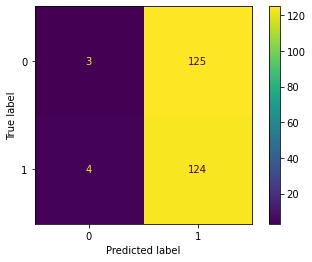

In [48]:
evaluate(pipe_final, X_test, y_test)

In [49]:
y_pred_final= pipe_final.predict(X_test)

final_predictions = pd.Series(y_pred_final, name='predictions', index=y_test.index)
price_prediction_final = pd.concat([y_test, final_predictions], axis=1)

price_prediction_final.head()

,Signal,predictions
2021-08-20 00:00:00+00:00,0,1
2021-08-21 00:00:00+00:00,1,1
2021-08-22 00:00:00+00:00,1,1
2021-08-23 00:00:00+00:00,0,1
2021-08-24 00:00:00+00:00,1,1


In [50]:
#merging predictions, true signals, and future returns

final_predictions = price_prediction_final.merge(returns_df, left_index=True, right_index=True)

final_predictions.head()

,Signal,predictions,Future_Returns
2021-08-20 00:00:00+00:00,0,1,-0.018513
2021-08-21 00:00:00+00:00,1,1,0.004969
2021-08-22 00:00:00+00:00,1,1,0.023794
2021-08-23 00:00:00+00:00,0,1,-0.044227
2021-08-24 00:00:00+00:00,1,1,0.016536


In [51]:
#creating empty datasets to append to
returns = []
returns_2 = []

for i in range(len(final_predictions)):

    if final_predictions.iloc[i].predictions == 1:
        
        #measuring amount of money if an investor were to invest $1000 everytime the model predicts to buy
        money = final_predictions.iloc[i].Future_Returns * 1000
        
        returns.append(money)
        returns_2.append(money)
    
    else:
        returns.append(0)

In [52]:
#saving prediced returns into df
final_predictions['predicted_returns'] = returns

print(sum(returns)) #the total returns over testing period
print(np.mean(returns_2)) #the average returns given the times when invested

157.13930541096468
0.6310815478351994


##### 63 cents per investment day

C:\Users\mikey\anaconda3\envs\contest_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


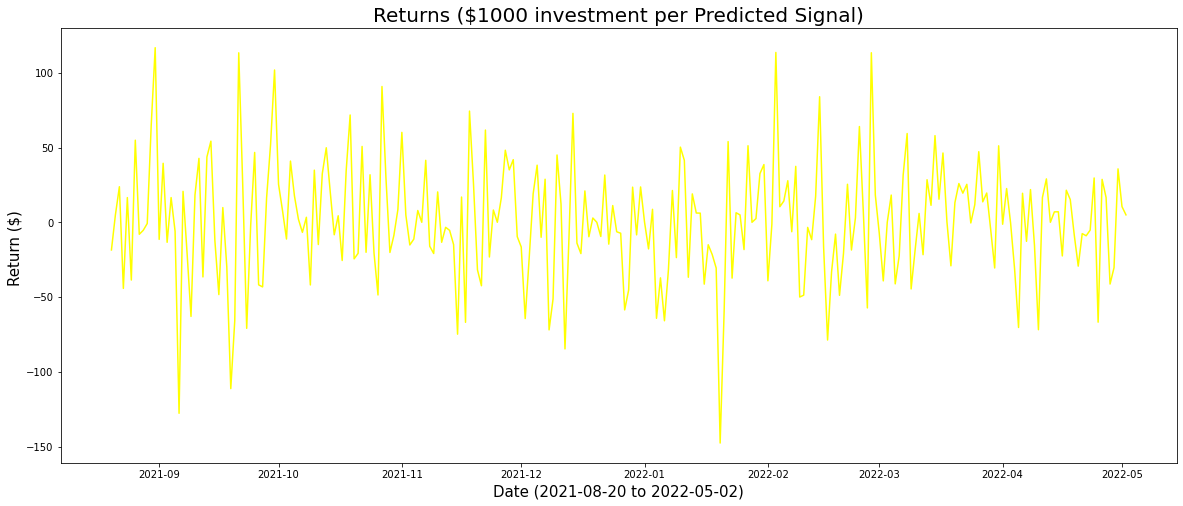

In [55]:
fig, ax = plt.subplots(figsize=(20,8))

sns.lineplot(final_predictions.index, final_predictions.predicted_returns, ax=ax, color='yellow')
ax.set_title("Returns ($1000 investment per Predicted Signal)", fontsize=20)
ax.set_ylabel('Return ($) ', fontsize=15)
ax.set_xlabel('Date (2021-08-20 to 2022-05-02)', fontsize=15)

plt.show()

# Conclusion

While the models' metrics were not the best, there seem to be an improvement when combining twitter sentiment data and financial data. Therefore, for future purposes, there will be improvment in twitter data collection, and different time variations since this is day by day chart.